# Low Probability High Impact scenarios

In [2]:
import importlib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

import knmi23_module as knmi23

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

In [3]:
importlib.reload(knmi23)

<module 'knmi23_module' from '/Users/dewilebars/Projects/KNMIClimateScenarios2021-2023/2023_KNMI2023/KNMI23_SeaLevelScenarios/knmi23_module.py'>

In [4]:
Projects_dir = '/Users/dewilebars/Projects/'
ProbSLR_dir = f'{Projects_dir}Project_ProbSLR/SLProj/'

## Read projections for the ocean dynamics

In [14]:
proj_data_dir = f'{ProbSLR_dir}/outputs/KNMI23/'

REG = 'Netherlands'

if REG == 'Netherlands':
    KNMI23_ssp126 = xr.open_dataset(f'{proj_data_dir}SeaLevelPerc_KNMI23_ssp126_v19.nc')
    KNMI23_ssp585 = xr.open_dataset(f'{proj_data_dir}SeaLevelPerc_KNMI23_ssp585_v19.nc')
elif REG == 'Bonaire':
    KNMI23_ssp126 = xr.open_dataset(f'{proj_data_dir}SeaLevelPerc_KNMI23_ssp126_Bonaire_v01.nc')
    KNMI23_ssp585 = xr.open_dataset(f'{proj_data_dir}SeaLevelPerc_KNMI23_ssp585_Bonaire_v01.nc')
elif REG == 'Saba':
    KNMI23_ssp126 = xr.open_dataset(f'{proj_data_dir}SeaLevelPerc_KNMI23_ssp126_Saba_v01.nc')
    KNMI23_ssp585 = xr.open_dataset(f'{proj_data_dir}SeaLevelPerc_KNMI23_ssp585_Saba_v01.nc')
elif REG == 'Suriname':
    KNMI23_ssp126 = xr.open_dataset(f'{proj_data_dir}SeaLevelPerc_KNMI23_ssp126_Suriname_v01.nc')
    KNMI23_ssp585 = xr.open_dataset(f'{proj_data_dir}SeaLevelPerc_KNMI23_ssp585_Suriname_v01.nc')
    
lon_reg, lat_reg = KNMI23_ssp126.Fingerprint_location.data

GIA = KNMI23_ssp126.perc_ts.sel(proc='GIA', percentiles='50')
vlm_rate = GIA.isel(time=1)-GIA.isel(time=0)
    
KNMI23_ssp126 = knmi23.new_ref_period(KNMI23_ssp126.perc_ts)
KNMI23_ssp585 = knmi23.new_ref_period(KNMI23_ssp585.perc_ts)

In [15]:
lon_reg, lat_reg

(5, 53)

## Base LPHI scenario on [van de Wal et al. 2022](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2022EF002751)

In [16]:
col_names = ['vdw_low_2100', 'vdw_high_2100', 'vdw_low_2300', 'vdw_high_2300']
indexes = ['Thermal exp.', 'Greenland', 'Antarctica', 'Glaciers', 'Land Storage']

glo_vdw = [[0.18, 0.36, 0.35, 1.51],
           [0.10, 0.29, 0.39, 2.5],
           [0.39, 0.59, 1.35, 6],
           [0.15, 0.27, 0.28, 0.32],
           [0.04, 0.04, 0.10, 0.10]]

glo_lphi_df = pd.DataFrame(glo_vdw, columns=col_names, index=indexes)

glo_lphi_df = glo_lphi_df[['vdw_low_2100', 'vdw_low_2300', 'vdw_high_2100', 'vdw_high_2300']]

glo_lphi_df.loc['Total'] = glo_lphi_df.sum(axis=0)

In [17]:
glo_lphi_df

,vdw_low_2100,vdw_low_2300,vdw_high_2100,vdw_high_2300
Thermal exp.,0.18,0.35,0.36,1.51
Greenland,0.10,0.39,0.29,2.50
Antarctica,0.39,1.35,0.59,6.00
Glaciers,0.15,0.28,0.27,0.32
Land Storage,0.04,0.10,0.04,0.10
Total,0.86,2.47,1.55,10.43


## Additional scenarios based on MICI and SEJ

For the MICI scenario the Antarctic contribution to sea level rise comes from [DeConto et al. 2021](https://www.nature.com/articles/s41586-021-03427-0) Table 1. Low scenario is the upper end (83rd percentile) of the RCP2.6 scenario and the high scenario is the upper end of the RCP8.5 scenario. Other processes are the same as van de Wal et al. 2022.

In [18]:
glo_lphi_df['mici_low_2100'] = glo_lphi_df['vdw_low_2100']
glo_lphi_df['mici_low_2300'] = glo_lphi_df['vdw_low_2300']
glo_lphi_df['mici_high_2100'] = glo_lphi_df['vdw_high_2100']
glo_lphi_df['mici_high_2300'] = glo_lphi_df['vdw_high_2300']

glo_lphi_df.loc['Antarctica', 'mici_low_2100'] = 0.12
glo_lphi_df.loc['Antarctica', 'mici_low_2300'] = 1.36

glo_lphi_df.loc['Antarctica', 'mici_high_2100'] = 0.53
glo_lphi_df.loc['Antarctica', 'mici_high_2300'] = 13.55

# Recompute the total
glo_lphi_df.loc['Total'] = glo_lphi_df.iloc[0:4].sum(axis=0)

For the SEJ Greenland and Antarctica are taken from the 95th percentile of Table 1 of [Bamber et al. 2019](http://www.pnas.org/lookup/doi/10.1073/pnas.1817205116). 

Because we use van de Wal et al. 2022 as baseline, only values for 2100 and 2300 are used even though Bamber et al. 2019 also reports 2050 and 2200. 

In [19]:
glo_lphi_df['sej_low_2100'] = glo_lphi_df['vdw_low_2100']
glo_lphi_df['sej_low_2300'] = glo_lphi_df['vdw_low_2300']
glo_lphi_df['sej_high_2100'] = glo_lphi_df['vdw_high_2100']
glo_lphi_df['sej_high_2300'] = glo_lphi_df['vdw_high_2300']

# Numbers for Antarctica: WAIS, EAIS 
glo_lphi_df.loc['Antarctica', 'sej_low_2100'] = 0.44 + 0.12
glo_lphi_df.loc['Greenland', 'sej_low_2100'] = 0.57

glo_lphi_df.loc['Antarctica', 'sej_low_2300'] = 2.48 + 0.96
glo_lphi_df.loc['Greenland', 'sej_low_2300'] = 2.37

glo_lphi_df.loc['Antarctica', 'sej_high_2100'] = 0.93 + 0.46
glo_lphi_df.loc['Greenland', 'sej_high_2100'] = 0.99

glo_lphi_df.loc['Antarctica', 'sej_high_2300'] = 3.84 + 4.98
glo_lphi_df.loc['Greenland', 'sej_high_2300'] = 3.49

# Recompute the total
glo_lphi_df.loc['Total'] = glo_lphi_df.iloc[0:4].sum(axis=0)

In [20]:
glo_lphi_df

,vdw_low_2100,vdw_low_2300,vdw_high_2100,vdw_high_2300,mici_low_2100,mici_low_2300,mici_high_2100,mici_high_2300,sej_low_2100,sej_low_2300,sej_high_2100,sej_high_2300
Thermal exp.,0.18,0.35,0.36,1.51,0.18,0.35,0.36,1.51,0.18,0.35,0.36,1.51
Greenland,0.10,0.39,0.29,2.50,0.10,0.39,0.29,2.50,0.57,2.37,0.99,3.49
Antarctica,0.39,1.35,0.59,6.00,0.12,1.36,0.53,13.55,0.56,3.44,1.39,8.82
Glaciers,0.15,0.28,0.27,0.32,0.15,0.28,0.27,0.32,0.15,0.28,0.27,0.32
Land Storage,0.04,0.10,0.04,0.10,0.04,0.10,0.04,0.10,0.04,0.10,0.04,0.10
Total,0.82,2.37,1.51,10.33,0.55,2.38,1.45,17.88,1.46,6.44,3.01,14.14


## Convert global to local projection

In [21]:
fingerprints = knmi23.read_constant_fp('AR5', lat_reg, lon_reg)

# Build fingerprints for the table
fp = [1, 
      (fingerprints['GSMB']+fingerprints['GDYN'])/2, 
      fingerprints['ADYN'], 
      fingerprints['GIC'], 
      fingerprints['GW']]

In [23]:
fingerprints

{'GIC': 0.7480514526367188,
 'GSMB': 0.20718278884887695,
 'ASMB': 1.0741610717773438,
 'GDYN': 0.2208646011352539,
 'ADYN': 1.1093885803222656,
 'GW': 0.7055201721191406}

In [22]:
fp

[1,
 0.21402369499206542,
 1.1093885803222656,
 0.7480514526367188,
 0.7055201721191406]

In [12]:
# Read steric sea level computed in LongTermProj.ipynb
ssp585_odyn = pd.read_csv(f'./outputs/knmi23_odyn_extrapolation2300_ssp585_{REG}.csv')
ssp585_odyn.set_index('time', inplace=True)


In [13]:
def build_loc_proj_lphi(glo_df, fp, vlm_rate):
    
    # Multiply by fingerprints
    df = glo_df.iloc[0:5].copy()
    df['reg_fingerprints'] = fp
    df.update(df.iloc[:, :-1].mul(df.reg_fingerprints, 0))
    del(df['reg_fingerprints'])
    
    # Add vertical land motion:
    vlm_2100 = vlm_rate*(2100-2005)
    vlm_2300 = vlm_rate*(2300-2005)
    
    vlm = np.zeros(12)
    vlm[0::2] = vlm_2100
    vlm[1::2] = vlm_2300
    
    df.loc['VLM'] = vlm/1000
    
    # Add ocean dynamics
    odyn = np.ones(12)
    
    odyn_ssp126 = KNMI23_ssp126.sel(proc='Ocean Dynamic Sea Level', percentiles=['95'])
    odyn[0::4] = (odyn_ssp126.sel(time=slice(2090,2100)).mean(dim='time') - 
               odyn_ssp126.sel(time=slice(1995,2014)).mean(dim='time'))/100 # Convert from cm to m
    odyn[1::4] = odyn[0::4]
    
    odyn_ssp585 = KNMI23_ssp585.sel(proc='Ocean Dynamic Sea Level', percentiles=['95'])
    odyn[2::4] = (odyn_ssp585.sel(time=slice(2090,2100)).mean(dim='time') - 
               odyn_ssp585.sel(time=slice(1995,2014)).mean(dim='time'))/100 # Convert from cm to m
    
    odyn[3::4] = ssp585_odyn.loc[2300,'95']

    df.loc['Ocean Dyn.'] = odyn
    
    df.loc['Total'] = df.sum(axis=0)
    
    return df

In [14]:
loc_lphi_df = build_loc_proj_lphi(glo_lphi_df, fp, vlm_rate)

loc_lphi_df

,vdw_low_2100,vdw_low_2300,vdw_high_2100,vdw_high_2300,mici_low_2100,mici_low_2300,mici_high_2100,mici_high_2300,sej_low_2100,sej_low_2300,sej_high_2100,sej_high_2300
Thermal exp.,0.180000,0.350000,0.360000,1.510000,0.180000,0.350000,0.360000,1.510000,0.180000,0.350000,0.360000,1.510000
Greenland,0.097005,0.378320,0.281315,2.425130,0.097005,0.378320,0.281315,2.425130,0.552930,2.299023,0.960351,3.385481
Antarctica,0.451385,1.562485,0.682864,6.944380,0.138888,1.574059,0.613420,15.682724,0.648142,3.981444,1.608781,10.208238
Glaciers,0.150783,0.281461,0.271409,0.321670,0.150783,0.281461,0.271409,0.321670,0.150783,0.281461,0.271409,0.321670
Land Storage,0.041033,0.102582,0.041033,0.102582,0.041033,0.102582,0.041033,0.102582,0.041033,0.102582,0.041033,0.102582
VLM,-0.001425,-0.004425,-0.001425,-0.004425,-0.001425,-0.004425,-0.001425,-0.004425,-0.001425,-0.004425,-0.001425,-0.004425
Ocean Dyn.,0.091523,0.091523,0.105572,0.377542,0.091523,0.091523,0.105572,0.377542,0.091523,0.091523,0.105572,0.377542
Total,1.010304,2.761947,1.740768,11.676879,0.697806,2.773521,1.671324,20.415224,1.662985,7.101609,3.345721,15.901089


## Fit polynomials 

We fit a 3rd order polynomial. We have 4 unknonws and 4 constraints: heights in 2005, 2100, 2300 and rate in 2005.

This method only works for the high scenarios. For the low scenarios, a 3rd order polynomial fit results in a sea level drop between 2500 and 2300 which is not realistic.

In [15]:
lphi_ts_df = pd.DataFrame(index=np.arange(2005,2301,1))

scen_names = ['vdw_low', 'vdw_high', 'mici_low', 'mici_high', 
              'sej_low', 'sej_high']

for scen in ['vdw_high', 'mici_high', 'sej_high']:

    fp0 = 0.003 # Rate of sea level rise in 2005 [m/s]
    f0 = 0 # Height in 2005 
    f1 = loc_lphi_df.loc['Total',f'{scen}_2100'] # Height in 2100
    f2 = loc_lphi_df.loc['Total',f'{scen}_2300'] # Height in 2300

    t0 = 2005
    t1 = 2100-t0
    t2 = 2300-t0

    aup = fp0*(t2*t1**2-t1*t2**2)+f0*(t1**2-t2**2)+f1*t2**2-f2*t1**2
    a = aup/(t1**3*t2**2-t2**3*t1**2)
    b = (f2-a*t2**3-fp0*t2-f0)/t2**2
    c = fp0
    d = f0

    t = lphi_ts_df.index-t0
    lphi_ts_df[scen] = a*t**3 + b*t**2 + c*t + d

lphi_ts_df.index.name = 'time'
lphi_ts_df.index = lphi_ts_df.index+0.5

lphi_ts_df

,vdw_high,mici_high,sej_high
time,,,
2005.5,0.000000,0.000000,0.000000
2006.5,0.003179,0.003120,0.003417
2007.5,0.006715,0.006483,0.007666
2008.5,0.010606,0.010089,0.012742
2009.5,0.014852,0.013942,0.018639
...,...,...,...
2296.5,11.437365,19.757253,15.766772
2297.5,11.497198,19.920453,15.801290
2298.5,11.557062,20.084514,15.835186


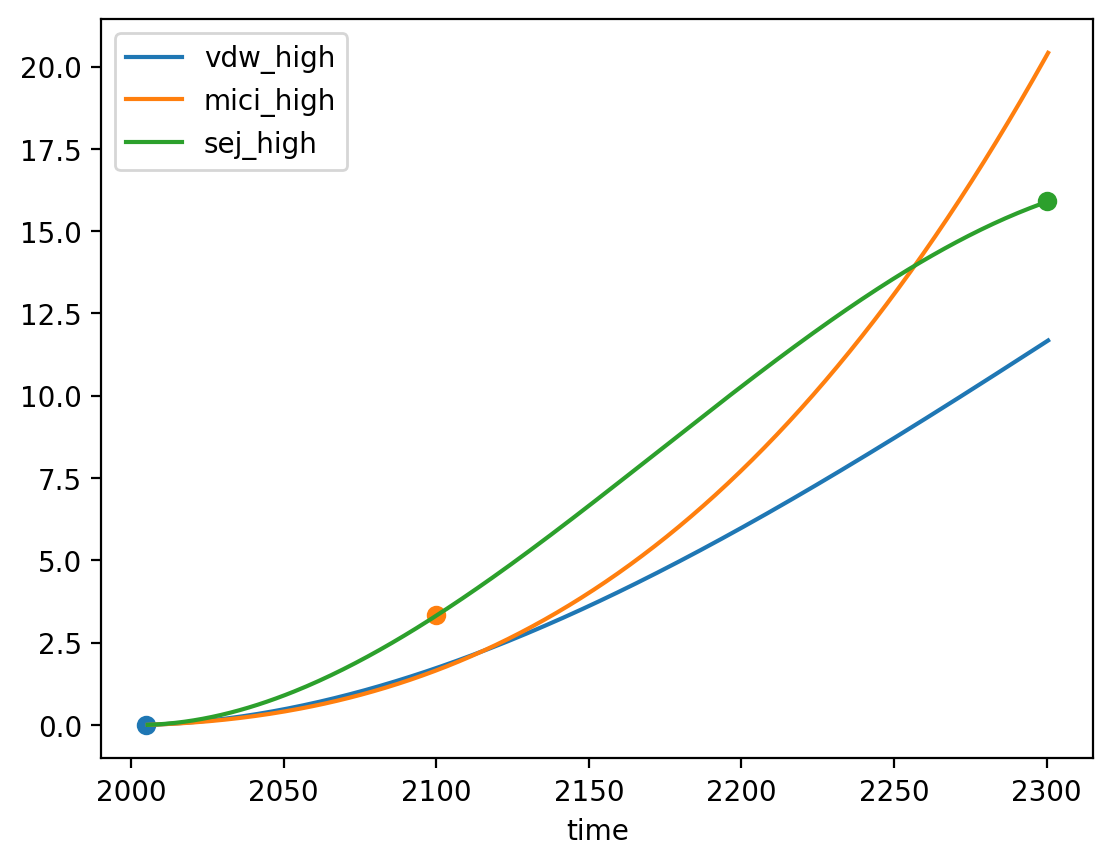

In [16]:
lphi_ts_df.plot()
plt.scatter(t0, f0)
plt.scatter(2100,loc_lphi_df.loc['Total',f'{scen}_2100'])
plt.scatter(2300,loc_lphi_df.loc['Total',f'{scen}_2300'])

## Export data as csv files

In [17]:
lphi_ts_df.to_csv(f'./outputs/knmi23_lphi_{REG}.csv')

In [18]:
REG

'Suriname'